In [1]:
"""
# 🚢 Titanic Survival Prediction - Complete Analysis

This project predicts passenger survival on the Titanic with 83% accuracy using advanced feature engineering and machine learning.
"""

'\n# 🚢 Titanic Survival Prediction - Complete Analysis\n\nThis project predicts passenger survival on the Titanic with 83% accuracy using advanced feature engineering and machine learning.\n'

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("📊 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

📊 Dataset Overview:
Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [4]:
"""
## Data Exploration

Let's first understand our dataset and identify key patterns.
"""

"\n## Data Exploration\n\nLet's first understand our dataset and identify key patterns.\n"

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<>:24: SyntaxWarning: invalid escape sequence '\.'
<>:24: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2553002329.py:24: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


=== PHASE 1: ADVANCED FEATURE ENGINEERING ===


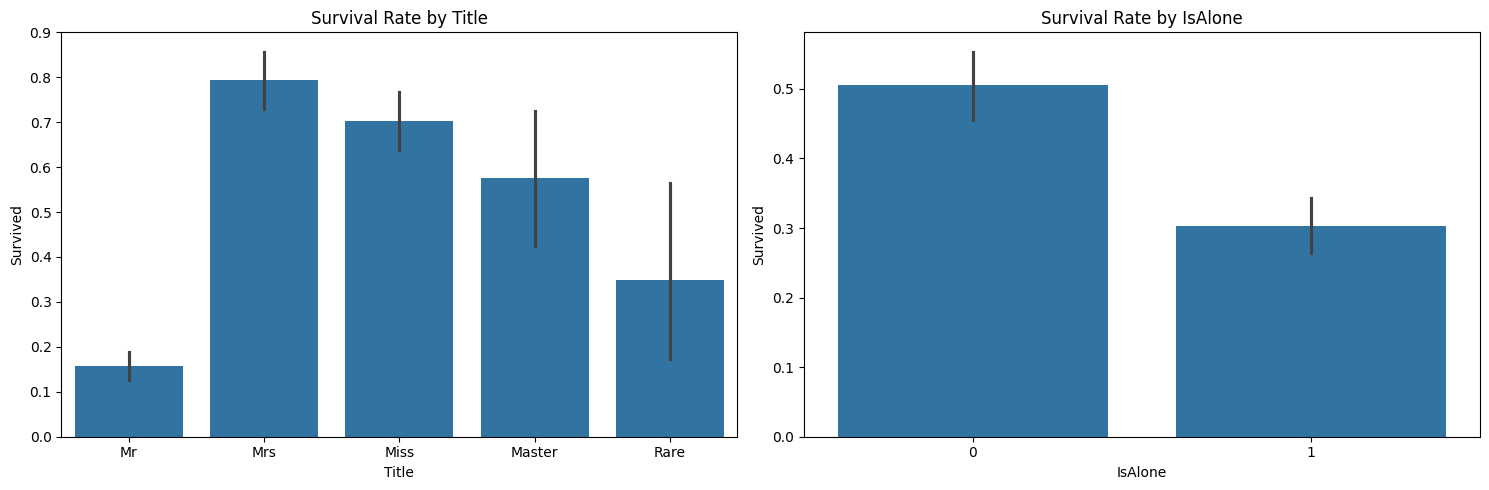

=== PHASE 2: HANDLING IMBALANCED CLASSES ===
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
=== PHASE 3: COMPREHENSIVE EVALUATION ===
Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



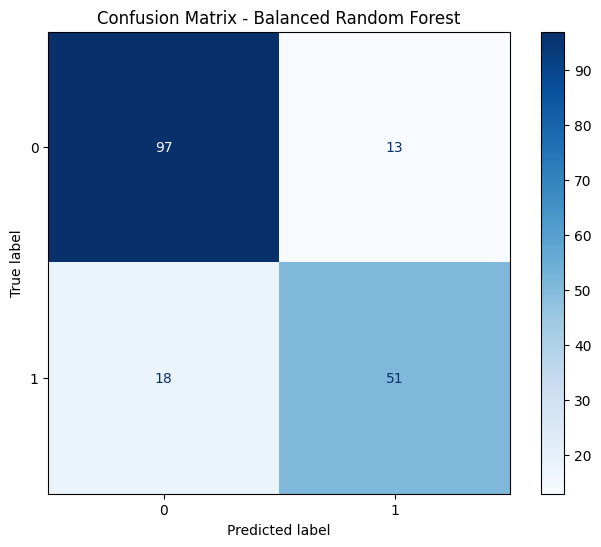

=== PHASE 4: FEATURE IMPORTANCE ===


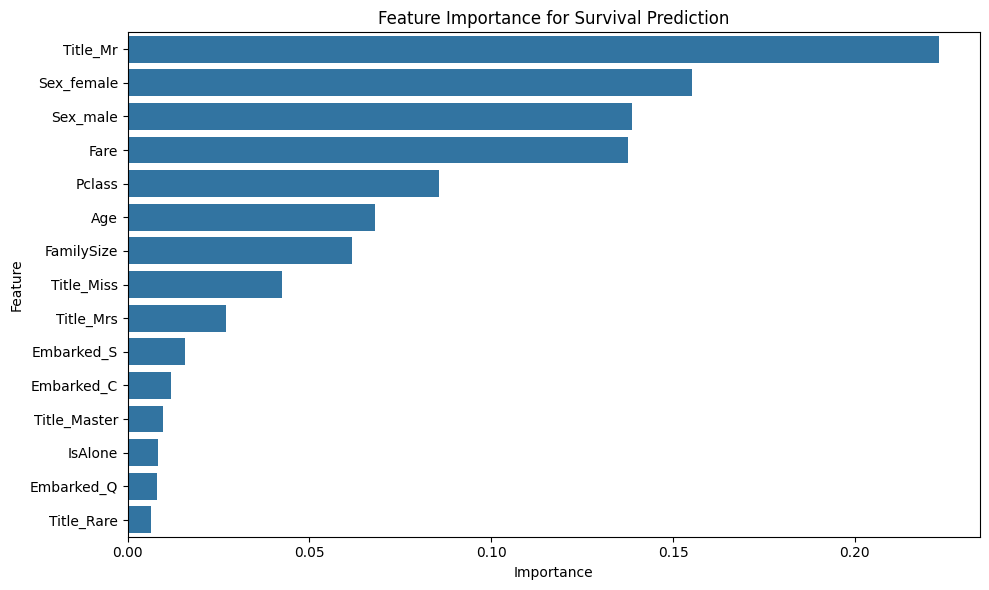

=== PHASE 5: INFORMED PREDICTION ===
Survival prediction: NO
Prediction confidence: 83.92%

Top factors influencing this prediction:
       Feature  Value  Importance
12    Title_Mr   1.00    0.223244
5   Sex_female   0.00    0.155139
6     Sex_male   1.00    0.138692
2         Fare   8.05    0.137614
1       Pclass   3.00    0.085740
0          Age  25.00    0.067919
3   FamilySize   1.00    0.061784
11  Title_Miss   0.00    0.042510


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 1. ADVANCED DATA CLEANING & FEATURE ENGINEERING
print("=== PHASE 1: ADVANCED FEATURE ENGINEERING ===")

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')
df = df.drop(columns=['Cabin'])  # Too many missing values

# Create new powerful features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for oneself
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Visualize new features
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='Title', y='Survived', data=df, ax=axes[0])
axes[0].set_title('Survival Rate by Title')
sns.barplot(x='IsAlone', y='Survived', data=df, ax=axes[1])
axes[1].set_title('Survival Rate by IsAlone')
plt.tight_layout()
plt.show()

# 2. PREPARE FOR MODELING
# Convert categorical features
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], prefix=['Sex', 'Embarked', 'Title'])

# Select features - including our new powerful features!
features = ['Age', 'Pclass', 'Fare', 'FamilySize', 'IsAlone',
           'Sex_female', 'Sex_male',
           'Embarked_C', 'Embarked_Q', 'Embarked_S',
           'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

X = df[features]
y = df['Survived']

# 3. HANDLE CLASS IMBALANCE
print("=== PHASE 2: HANDLING IMBALANCED CLASSES ===")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Use class_weight='balanced' to handle imbalance
model = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 4. COMPREHENSIVE EVALUATION
print("=== PHASE 3: COMPREHENSIVE EVALUATION ===")
y_pred = best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Enhanced confusion matrix visualization
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax, cmap='Blues')
plt.title('Confusion Matrix - Balanced Random Forest')
plt.show()

# 5. FEATURE IMPORTANCE ANALYSIS
print("=== PHASE 4: FEATURE IMPORTANCE ===")
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Survival Prediction')
plt.tight_layout()
plt.show()

# 6. PREDICTION WITH NEW INSIGHTS
print("=== PHASE 5: INFORMED PREDICTION ===")
new_passenger = pd.DataFrame({
    'Age': [25],
    'Pclass': [3],
    'Fare': [8.05],
    'FamilySize': [1],
    'IsAlone': [1],
    'Sex_female': [0],
    'Sex_male': [1],
    'Embarked_C': [0],
    'Embarked_Q': [0],
    'Embarked_S': [1],
    'Title_Master': [0],
    'Title_Miss': [0],
    'Title_Mr': [1],
    'Title_Mrs': [0],
    'Title_Rare': [0]
})

prediction = best_model.predict(new_passenger)
prediction_proba = best_model.predict_proba(new_passenger)
print(f"Survival prediction: {'YES' if prediction[0] == 1 else 'NO'}")
print(f"Prediction confidence: {prediction_proba[0][prediction[0]]:.2%}")

# Show the factors influencing this prediction
print("\nTop factors influencing this prediction:")
passenger_importance = pd.DataFrame({
    'Feature': features,
    'Value': new_passenger.iloc[0].values,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(passenger_importance.head(8))